![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [21]:
import warnings
warnings.filterwarnings('ignore')

In [22]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


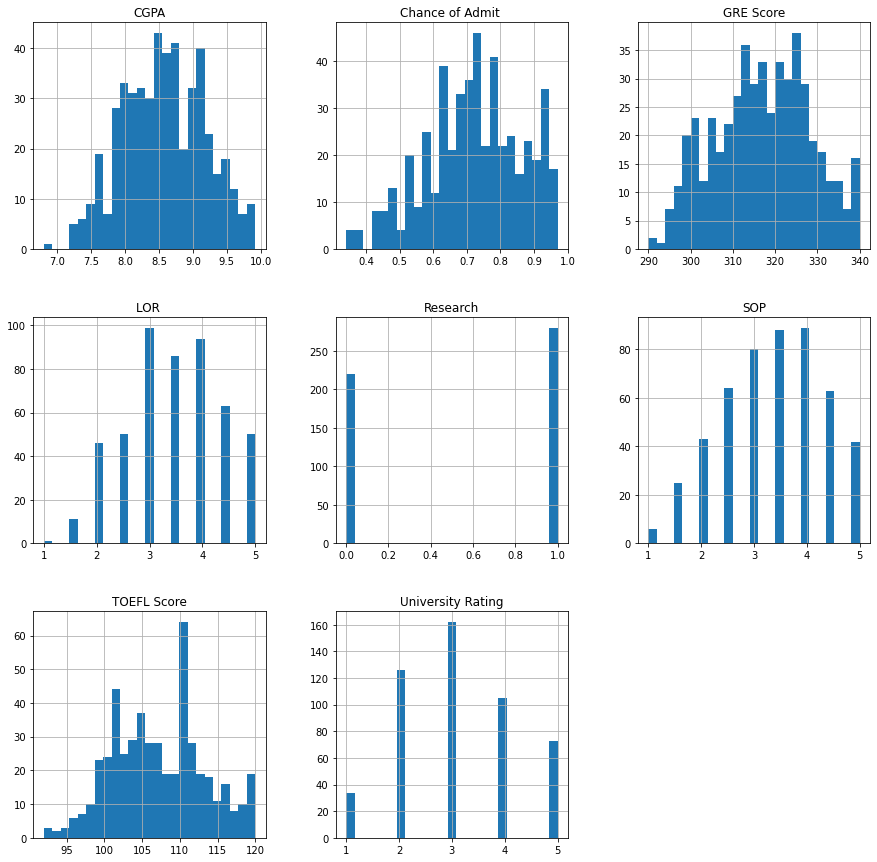

In [24]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [25]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [26]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

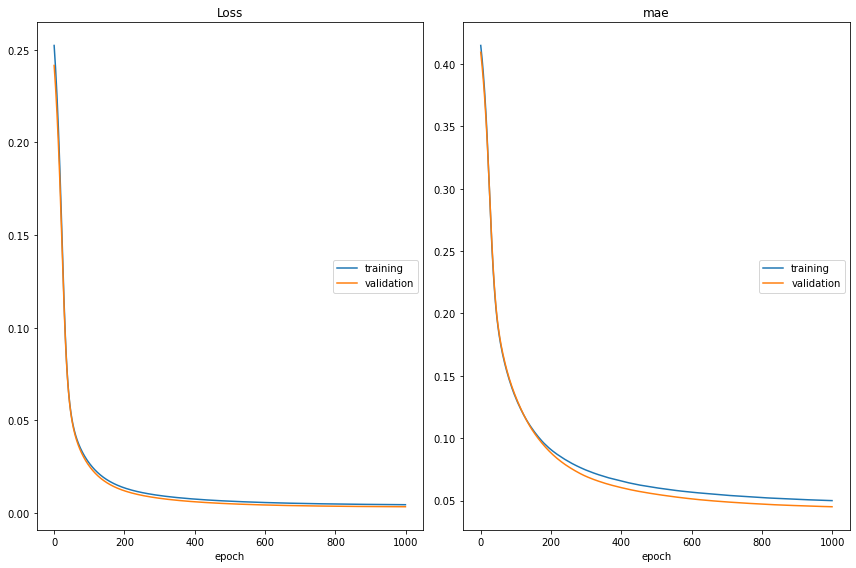

Loss
	training         	 (min:    0.005, max:    0.252, cur:    0.005)
	validation       	 (min:    0.003, max:    0.242, cur:    0.003)
mae
	training         	 (min:    0.050, max:    0.415, cur:    0.050)
	validation       	 (min:    0.045, max:    0.409, cur:    0.045)
11/11 [==============================] - 0s 36ms/step - loss: 0.0045 - mae: 0.0499 - val_loss: 0.0034 - val_mae: 0.0450
MSE:  0.0034276063088327646
MAE:  0.0450352281332016


In [27]:
# Celda 1
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras.layers import Dense, Activation

K.clear_session()
scaler = StandardScaler()
scaler.fit(X)

X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
X_train = np.array(X_train)
Y_train = np.array(yTrain)
X_test = np.array(X_test)
Y_test = np.array(yTest)

output_var = 1
dims = X_train.shape[1]

model1 = Sequential()


model1.add(Dense(output_var, input_shape=(dims,),activation='sigmoid'))

model1.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])
#print(model.summary())

modelo1 = model1.fit(X_train, Y_train, 
          verbose=True, 
          epochs=1000, 
          validation_data=(X_test,Y_test),
          callbacks=[PlotLossesKeras()])

print('MSE: ', min(modelo1.history['val_loss']))
print('MAE: ', min(modelo1.history['val_mae']))

# Justificaciones:  se utilizó Sigmoid debido a la naturaleza del problema, ya que es un problema de clasificación donde el resultado se debe dar en probabilidad.  
# Se usaron 1000 épocas ya que el algoritmo recién comenzó a convergir cerca a las 700 épocas

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

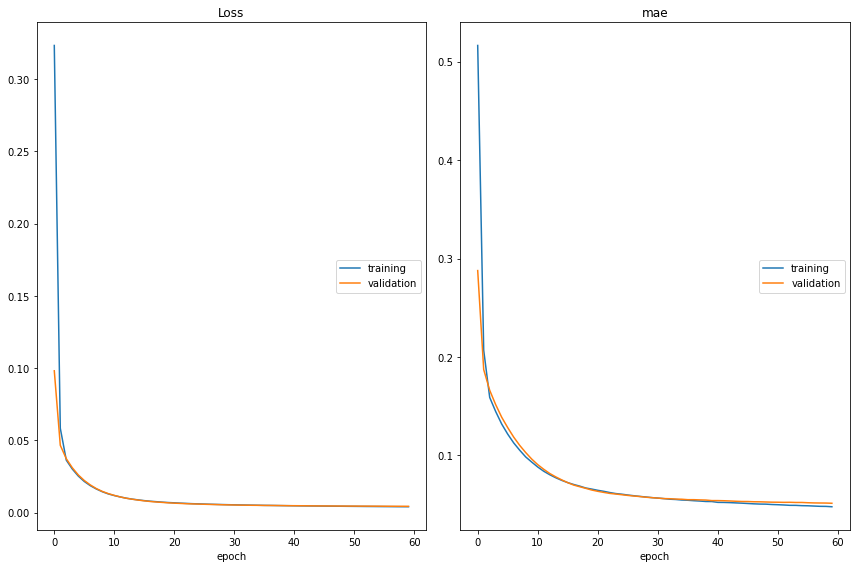

Loss
	training         	 (min:    0.004, max:    0.323, cur:    0.004)
	validation       	 (min:    0.004, max:    0.098, cur:    0.004)
mae
	training         	 (min:    0.048, max:    0.516, cur:    0.048)
	validation       	 (min:    0.051, max:    0.288, cur:    0.051)
11/11 [==============================] - 0s 33ms/step - loss: 0.0041 - mae: 0.0479 - val_loss: 0.0044 - val_mae: 0.0514
MSE:  0.004371069837361574
MAE:  0.05142539367079735


In [28]:
# Celda 2
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras.layers import Dense, Activation

K.clear_session()
scaler = StandardScaler()
scaler.fit(X)

X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
X_train = np.array(X_train)
Y_train = np.array(yTrain)
X_test = np.array(X_test)
Y_test = np.array(yTest)

output_var = 1
dims = X_train.shape[1]

model2 = Sequential()

model2.add(Dense(300, input_shape=(dims,),activation='relu'))
model2.add(Dense(300,activation='relu'))
model2.add(Dense(output_var))
model2.add(Activation('relu'))


model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])
#print(model.summary())


modelo2 = model2.fit(X_train, Y_train, 
          epochs=60, 
          validation_data=(X_test,Y_test),
          callbacks=[PlotLossesKeras()])

print('MSE: ', min(modelo2.history['val_loss']))
print('MAE: ', min(modelo2.history['val_mae']))

#Justificacion:se utilizaron 60 epocas puesto que se el modelo inicia a converger cerca de 30. 


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

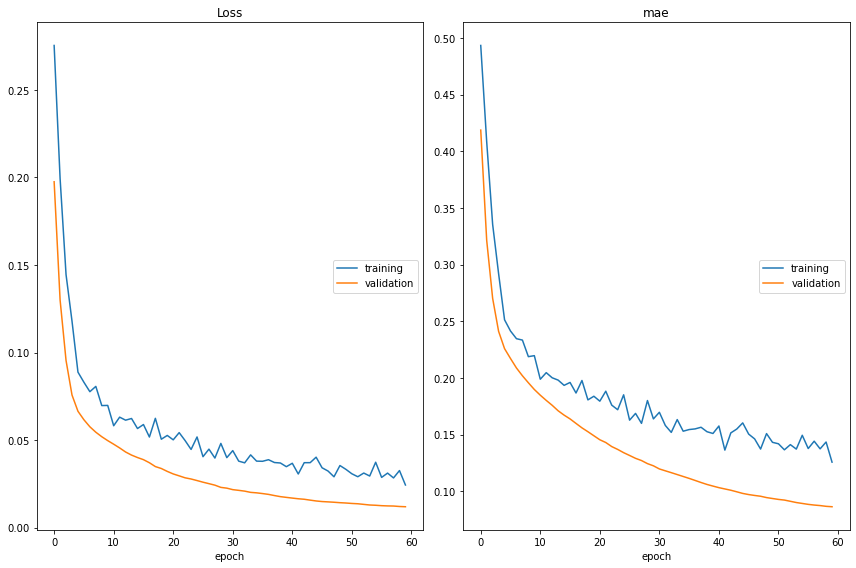

Loss
	training         	 (min:    0.024, max:    0.275, cur:    0.024)
	validation       	 (min:    0.012, max:    0.198, cur:    0.012)
mae
	training         	 (min:    0.126, max:    0.493, cur:    0.126)
	validation       	 (min:    0.086, max:    0.419, cur:    0.086)
3/3 [==============================] - 1s 307ms/step - loss: 0.0244 - mae: 0.1257 - val_loss: 0.0120 - val_mae: 0.0863
MSE:  0.011954078450798988
MAE:  0.08633489161729813


In [29]:
# Celda 3
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from sklearn.preprocessing import StandardScaler
from livelossplot import PlotLossesKeras
from keras.layers import Dense, Activation

K.clear_session()
scaler = StandardScaler()
scaler.fit(X)

X_train = pd.DataFrame(data=scaler.transform(xTrain), columns=xTrain.columns, index=xTrain.index)
X_test = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
X_train = np.array(X_train)
Y_train = np.array(yTrain)
X_test = np.array(X_test)
Y_test = np.array(yTest)

output_var = 1
dims = X_train.shape[1]

model = Sequential()

model.add(Dense(256, input_shape=(dims,),activation='relu'))
#model.add(Dropout(0.05))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.50,input_shape=(256,)))
model.add(Dense(output_var))
model.add(Activation('relu'))

#model.add(Dense(output_var, input_shape=(dims,)))

model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])
#print(model.summary())

early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

dllog = model.fit(X_train, Y_train, 
          verbose=True, 
          epochs=60, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[PlotLossesKeras(), best_model, early_stop])

print('MSE: ', min(dllog.history['val_loss']))
print('MAE: ', min(dllog.history['val_mae']))

# Justificaciones:  se utilizó otras funciones de activacion como identidad y tangente hiperbólica pero el modelo decaía en rendimiento.  
# igualmente sucedió cuando se agrego un Dropout luego de la capa de entrada, el modelo perdía poder predictivo. 
# La mejor combinación encontrada fue utiliza Relu y sólo una capa Dropout luego de la capa oculta y con una configuración de ruido.
# También la selección de cantidad de nodos y epocas se debió principalmente al incremento de cómputo.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

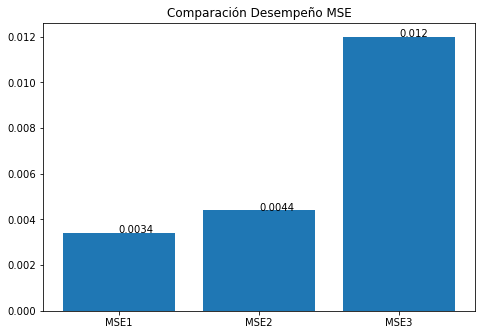

In [33]:
# Celda 4
MSE1=min(modelo1.history['val_loss'])
MSE2=min(modelo2.history['val_loss'])
MSE3=min(dllog.history['val_loss'])
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación Desempeño MSE")
ejeX = ['MSE1','MSE2','MSE3',]
ejeY = [round(MSE1,4),round(MSE2,4),round(MSE3,4),]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

In [32]:
# Es posible observar que el modelo de 1 capa genera el error cuadratico mas bajo, sin embargo fueron necesarias mas de 700
# epocas para poder encontrar la estabilizacion de las métricas de desempeño. Contrario a este el modelo de dos capas tiene
# un error un poco mayor, sin embargo requirió de muchas menos épocas para su estabilizacion. Finalmente el tercer modelo tiene
# un peor desempeño frente a los dos primeros.